In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
sales_of_company_x = pd.read_csv("E:\\Python\\TSML-2\\TSML_HW1\\Series\\monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("E:\\Python\\TSML-2\\TSML_HW1\\Series\\monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("E:\\Python\\TSML-2\\TSML_HW1\\Series\\international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("E:\\Python\\TSML-2\\TSML_HW1\\Series\\mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("E:\\Python\\TSML-2\\TSML_HW1\\Series\\weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("E:\\Python\\TSML-2\\TSML_HW1\\Series\\daily-total-female-births-in-cal.csv")

In [5]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

# Нормализуем дисперсию

In [6]:
from scipy.stats import boxcox

In [40]:
series1 = boxcox(all_series["Monthly Boston armed robberies"], 0)

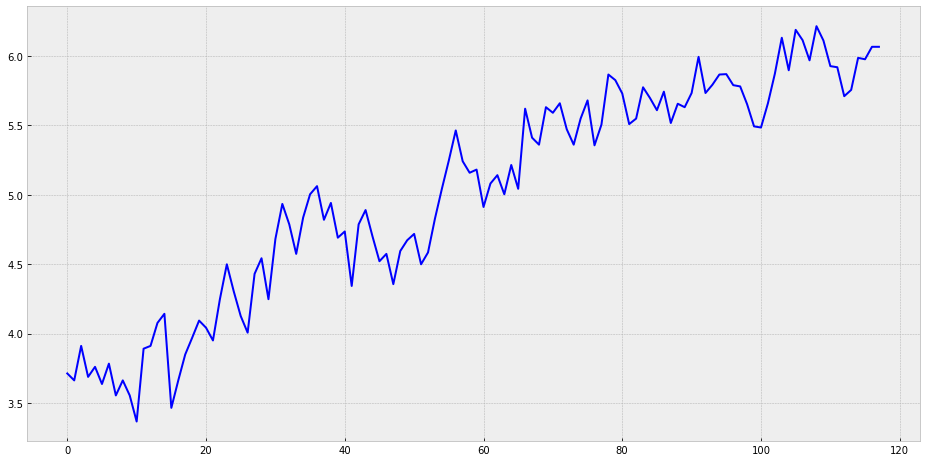

In [41]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series1, color='blue')

# Дифференцируем 

In [42]:
series1 = np.diff(series1, 1)

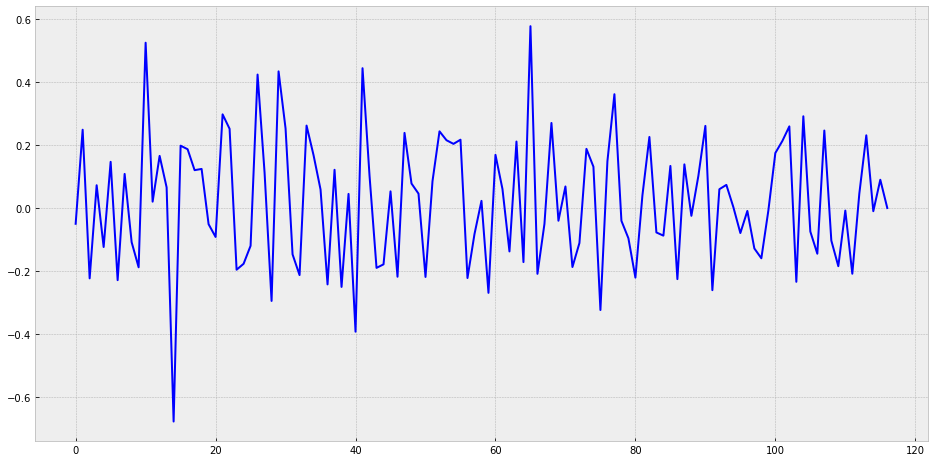

In [43]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series1, color='blue')

In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [50]:
test_stationarity(series1)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


In [51]:
test_stationarity(all_series["Monthly Boston armed robberies"])

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


# Скользящее среднее


In [22]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

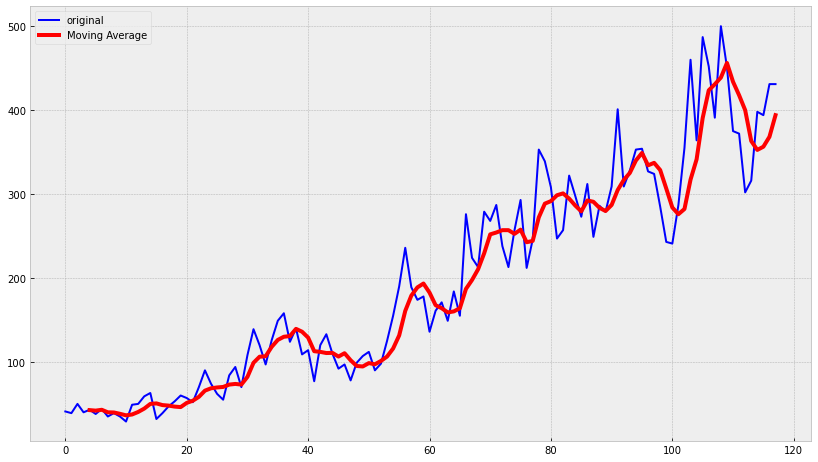

In [58]:
ser = moving_average(robberies_in_boston["Count"], 5)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(robberies_in_boston["Count"], color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

In [ ]:
# Как видно из гафика выше, Скользящее среднее угадывает тренд.

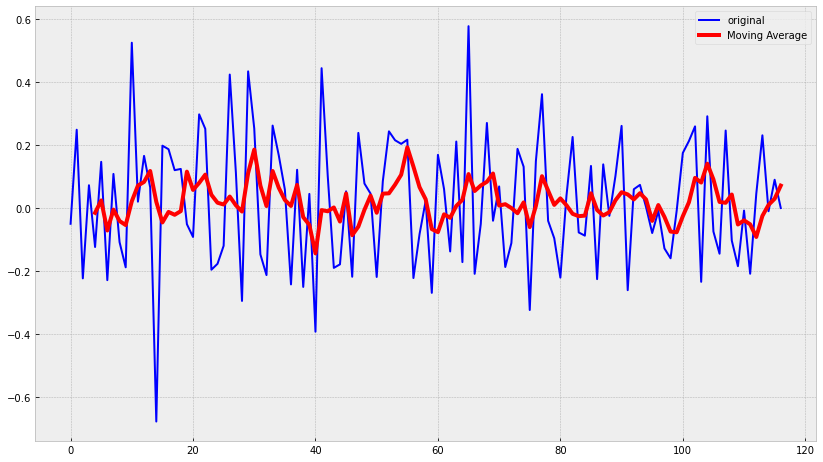

In [54]:
ser1 = moving_average(series1, 5)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series1, color='blue',label='original')
    plt.plot(ser1, color='red', linewidth='4', label='Moving Average')
    plt.legend()

In [55]:
# Очевидно, в графике ряда, приведенного к стационарному виду, тренд отсуствует.

# Взвешенная скользящая средняя

In [56]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

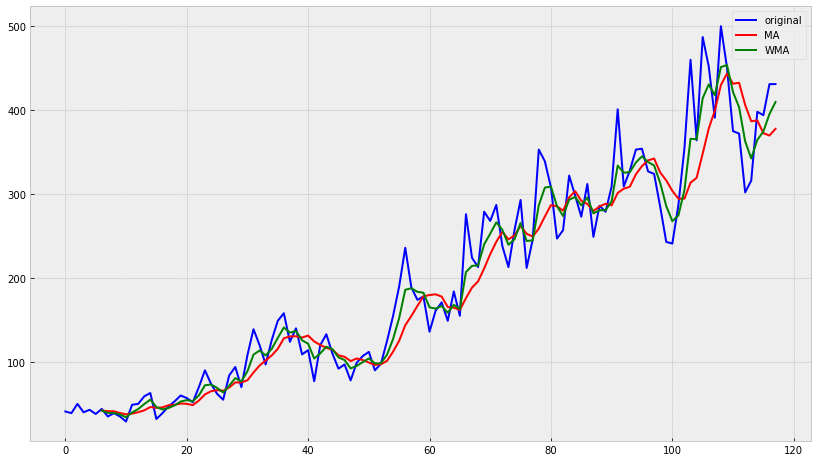

In [60]:
wma = weighted_moving_average(robberies_in_boston["Count"], 7, [1,1,2,3,5,8,13])
ma = moving_average(robberies_in_boston["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(robberies_in_boston["Count"], color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

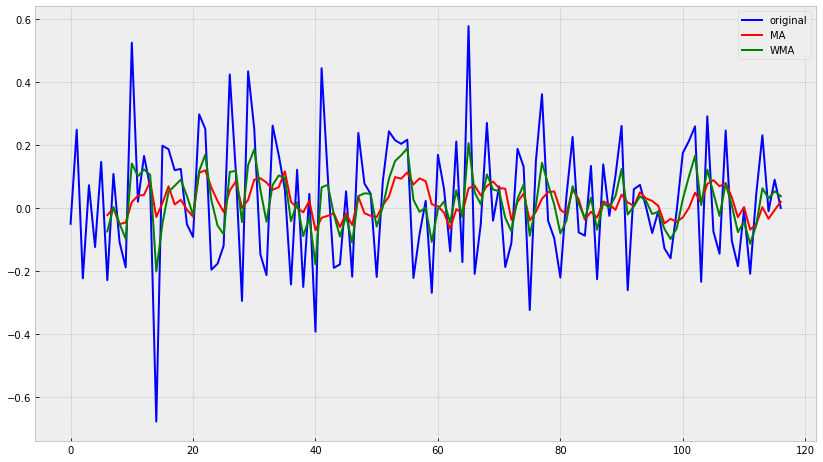

In [62]:
wma1 = weighted_moving_average(series1, 7, [1,1,2,3,5,8,13])
ma1 = moving_average(series1, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series1, color='blue',label='original')
    plt.plot(ma1, color='red', linewidth='2', label='MA')
    plt.plot(wma1, color='green', linewidth='2', label='WMA')
    plt.legend()

# Экспоненциальное сглаживание

In [64]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

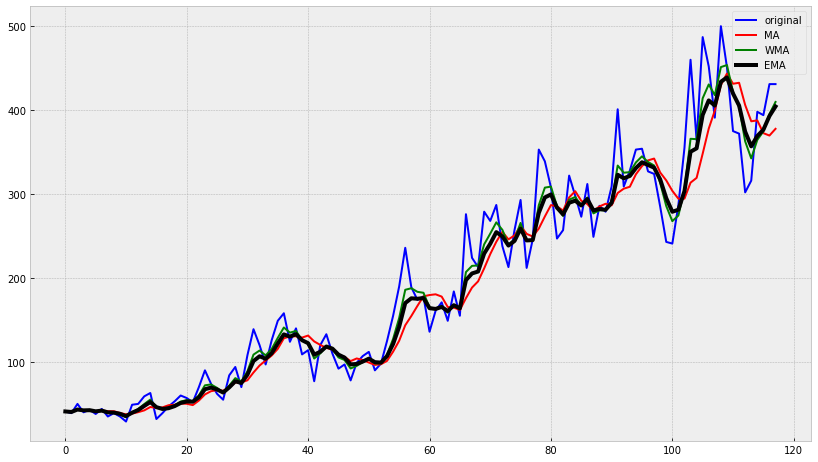

In [65]:
ema = exponential_moving_average(robberies_in_boston["Count"], 0.3)
wma = weighted_moving_average(robberies_in_boston["Count"], 7, [1,1,2,3,5,8,13])
ma = moving_average(robberies_in_boston["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(robberies_in_boston["Count"], color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()

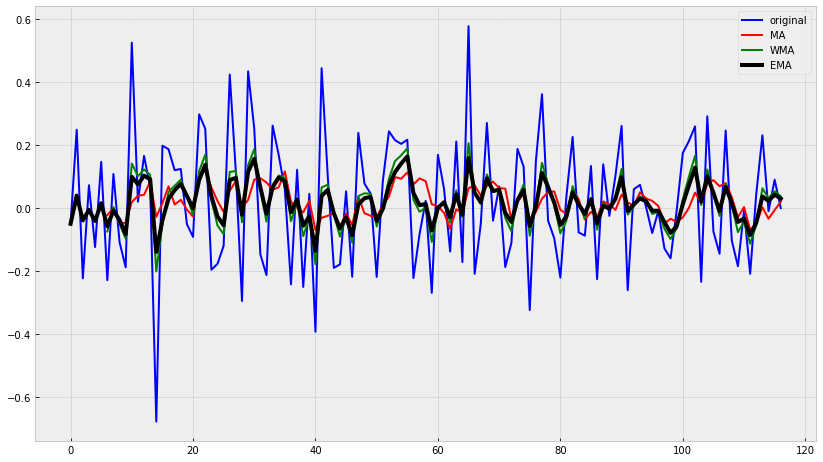

In [66]:
ema1 = exponential_moving_average(series1, 0.3)
wma1 = weighted_moving_average(series1, 7, [1,1,2,3,5,8,13])
ma1 = moving_average(series1, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series1, color='blue',label='original')
    plt.plot(ma1, color='red', linewidth='2', label='MA')
    plt.plot(wma1, color='green', linewidth='2', label='WMA')
    plt.plot(ema1, color='black', linewidth='4', label='EMA')
    plt.legend()

# Двойное экспоненциальное сглаживание

In [67]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [68]:
def plot_dema(alpha, beta):
    dema = double_ema(robberies_in_boston["Count"], alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(robberies_in_boston["Count"], color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

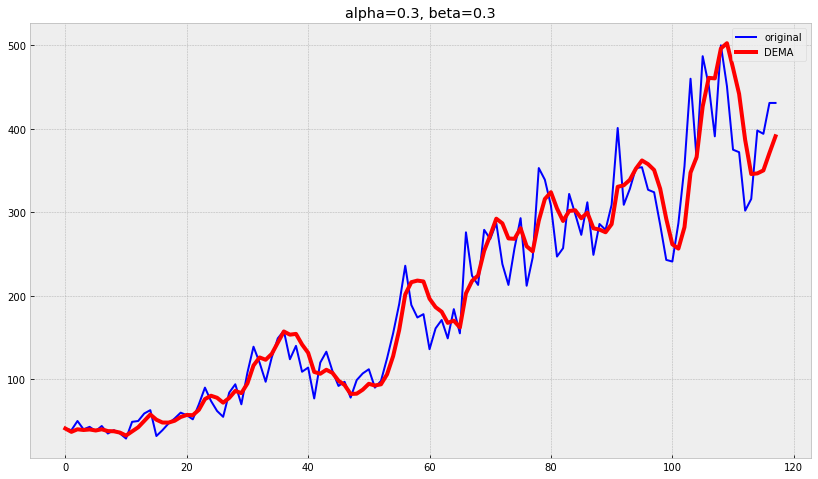

In [72]:
plot_dema(0.3, 0.3)

In [73]:
def plot_dema1(alpha, beta):
    dema = double_ema(series1, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(series1, color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

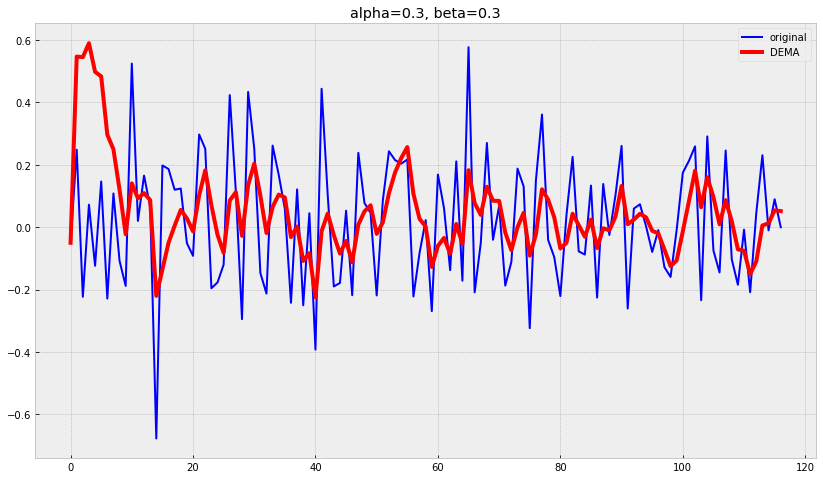

In [74]:
plot_dema1(0.3, 0.3)

# Хольт-Винтерс


In [86]:
def initial_trend(series, season_len):
    i = 0
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

In [87]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [88]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [89]:
def plot_tema(alpha, beta, gamma, ser=robberies_in_boston["Count"], ser_to_plot=robberies_in_boston["Count"], n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

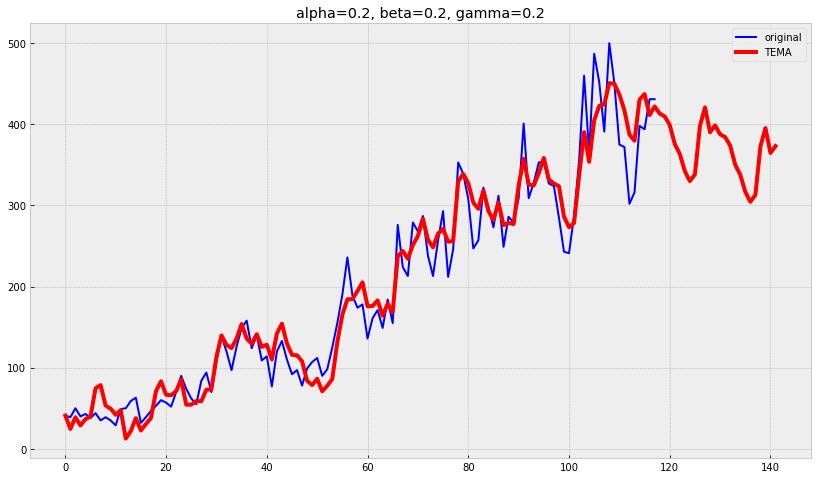

In [96]:
plot_tema(0.2, 0.2, 0.2)

In [91]:
def plot_tema1(alpha, beta, gamma, ser=series1, ser_to_plot=series1, n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

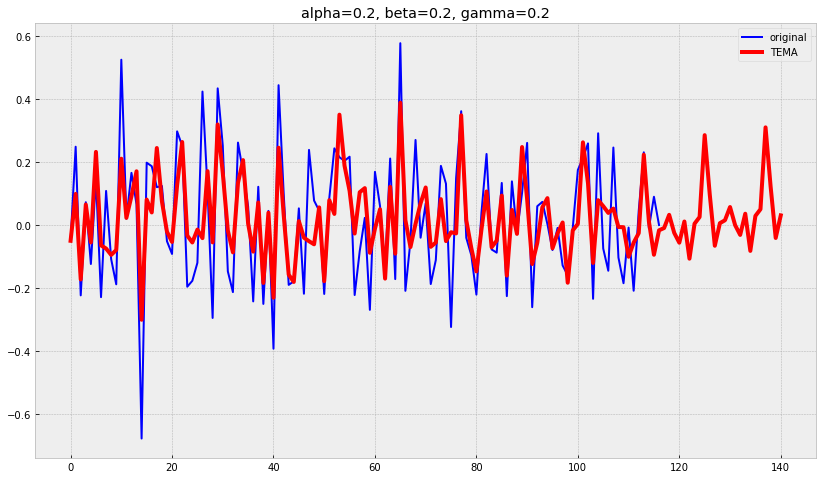

In [97]:
plot_tema1(0.2, 0.2, 0.2)

# Подбор параметров

In [98]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [99]:
series = robberies_in_boston["Count"]

In [100]:
train, test, val = series[:60], series[60:70], series[70:]

In [101]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [102]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [103]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 1947.268543541371
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.21833258e+02,  1.68256520e-03, -0.00000000e+00])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([1.        , 0.07511174, 1.        ])


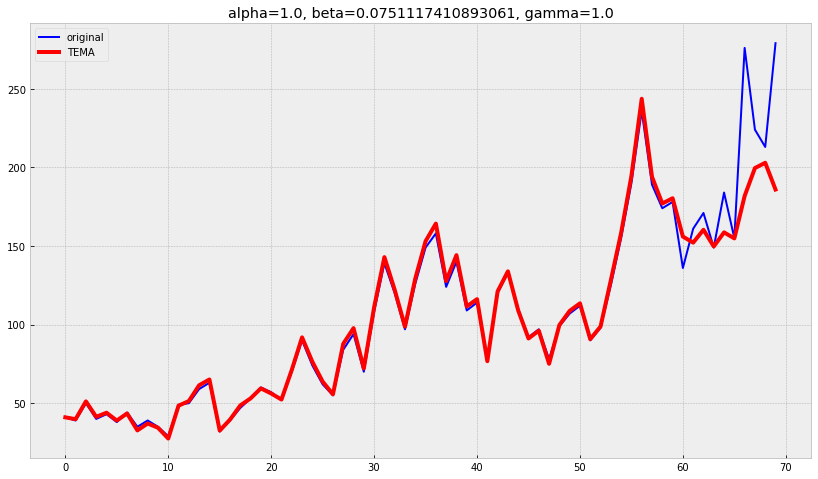

In [104]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series[:70], n_preds=len(test))

In [106]:
train, test, val = series1[:60], series1[60:70], series1[70:]

In [107]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [108]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [109]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 0.04190627891999953
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.01461361, -0.0001139 ,  0.00191905])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 192
      nit: 27
     njev: 48
   status: 0
  success: True
        x: array([0.00373788, 0.83243454, 0.        ])


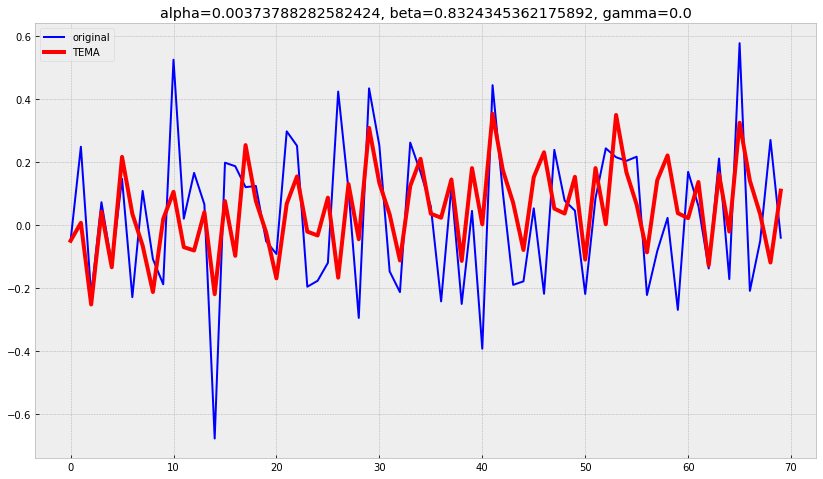

In [110]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series1[:70], n_preds=len(test))